<a href="https://colab.research.google.com/github/micheletempos/MVP-ML-PUC/blob/main/Classificacao_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Definição do Problema

O conjunto de dados utilizado neste projeto é o "Credit Card Fraud Detection", disponível para download e consulta no Kaggle através do seguinte link: [https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Trata-se de um conjunto de dados para Aprendizado Supervisionado, mais precisamente para a tarefa de Classificação.

Este conjunto de dados registra transações realizadas com cartões de crédito por titulares europeus durante o mês de setembro de 2013.

O conjunto de dados consiste em 31 atributos, abrangendo uma ampla gama de informações cruciais para a detecção de fraudes em transações com cartões de crédito. O principal objetivo é explorar esses dados para identificar padrões significativos e prever a ocorrência ou probabilidade de fraudes.

A coluna "Class" indica a presença de fraude, sendo representada por números inteiros: 0 para indicar a ausência de fraude e 1 para indicar a ocorrência de fraude.


**Informações sobre os atributos:**


1. **Time** -  Representa o intervalo de tempo, medido em segundos, entre cada transação e a primeira transação no conjunto de dados.
2. **Amount** = corresponde ao valor da transação
3. **Class** = Esta é a variável de resposta. Assume o valor 1 em caso de fraude e 0 caso contrário.
4. **V1...V28** = Devido a questões de confidencialidade, os recursos originais e informações adicionais sobre esses atributos não podem ser fornecidos.

Nota:
O link fornecido, na URL do código, direcionará para o GitHub, onde está disponível um arquivo Parquet. Este arquivo é uma versão comprimida do arquivo original mencionado neste trecho.

In [68]:
# Imports
import pandas as pd
import time
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from pprint import pprint

In [69]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

In [70]:
# Carrega arquivo parquet usando Pandas e indicando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/micheletempos/MVP-ML-PUC/master/credicard.parquet"


# Carga do dataset citando a variável url
df_origem = pd.read_parquet(url)


In [71]:
# Validando as primeiras linhas do dataset
df_origem.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [72]:
# Realizando um cópia dos dados originais
df = df_origem.copy()

# 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Neste ponto, serão analisadas as dimensões do dataset e suas informações, com alguns exemplos de linhas.

In [73]:
# Dimensões do dataset
# O Dataset é composto de 284.807 linhas e 31 colunas, isto é comprovado pela instrução print(base.shape)
print(df.shape)

(284807, 31)


In [74]:
# Informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Os dados do dataset são do tipo int e float, sendo que, aparentemente não há dados faltantes.

In [75]:
# exibindo a quantidade de linhas por coluna
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [76]:
# verificando valores missing para as colunas
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Com a verificação de missing, foi comprovado que não há registros nulos


In [77]:
# Quantidade de ocorrências por Classes
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [78]:
# Percentual de ocorrências por Classes
df["Class"].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Este dataset **está desbalanceado**, evidenciado pela disparidade no número de ocorrências entre as classes. A classe 0, que representa transações sem fraude, é significativamente maior, totalizando 99,82% das ocorrências, tornando-se a **classe majoritária**. Enquanto isso, a classe 1, que denota ocorrências de fraude, compreende apenas 0,17% das transações, caracterizando-se como a **classe minoritária**.

**Como Lidar com Classes Desbalanceadas?:**

* <i>Resampling</i>: Subamostragem (undersampling) da classe majoritária ou superamostragem (oversampling) da classe minoritária para equilibrar as classes.

* <i>Ponderação de Classes</i>: Alguns algoritmos permitem atribuir pesos diferentes às classes, dando mais importância à classe minoritária.

* <i>Geração Sintética de Dados</i>: Utilização de técnicas como SMOTE (Synthetic Minority Over-sampling Technique) para gerar dados sintéticos da classe minoritária.

In [79]:
# exibindo um sumário estatístico para atributos numéricos
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Observa-se que as colunas começadas por "V" estão vinculadas a uma escala de 10, o que pode complicar a interpretação dos dados. Portanto, optei por uma outra forma de apresentação do resumo estatístico, modificando os formatos visuais.

In [80]:
# Alterando temporariamente a exibição de informações para leitura do describe
with pd.option_context("display.max_columns", 50, #numero máximo de colunas que poderão ser exibidas
                       "display.precision", 2, # modificando para duas casas decimais
                       "display.float_format", lambda x: f"{x:,.2f}"): # ajustando a formatação de exibição
    display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,"284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00"
mean,"94,813.86",0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,"47,488.15",1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,"54,201.50",-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,"84,692.00",0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,"139,320.50",1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,"172,792.00",2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,"25,691.16",1.00


Agora, é possível observar que as colunas iniciadas por "V" possuem média 0, o que indica que alguma transformação já foi realizada, podendo até ter sido normalizadas. Entretatando, as colunas Time e Amount, precisarão ser normalizadas. A coluna, Amount, por exemplo, possui um desvio padrão de 250

## 3.2. Visualizações Unimodais

A fim de facilitar a leitura, algumas visualizações serão apenas das colunas iniciadas em V e outras visualizações, somente as que não iniciam com V

In [81]:
# Selecionando as colunas que começam com "V"
colunas_V = [col for col in df.columns if col.startswith("V")]

In [82]:
# selecionando as colunas que Time e Amount
colunas_nao_V = [col for col in df.columns if not col.startswith("V")]

### 3.2.1 Box Plot

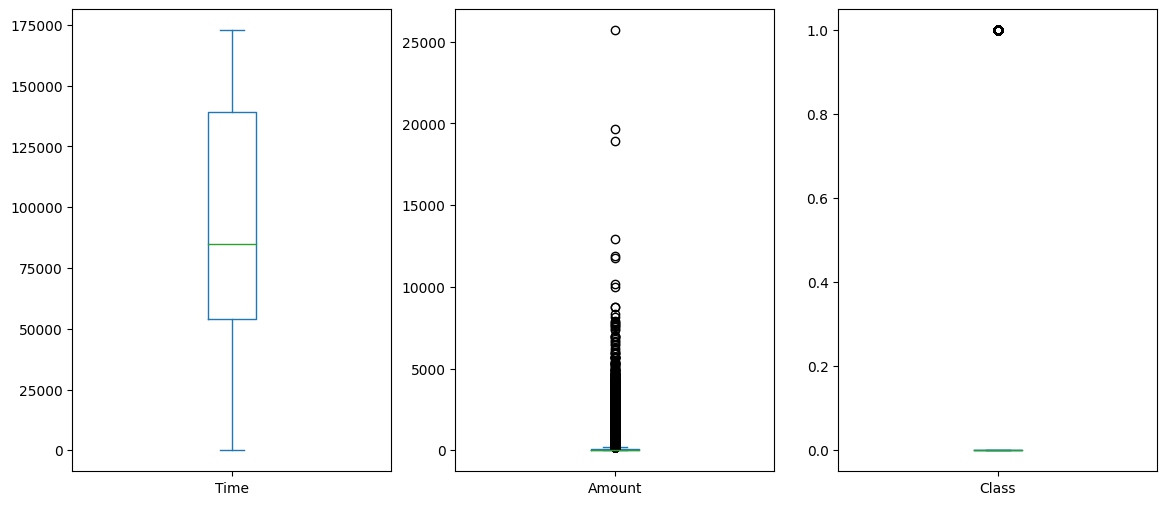

In [83]:
# Boxplot para colunas não iniciadas em V
df[colunas_nao_V].plot(kind='box', subplots=True, layout=(1, 3), sharex=False, sharey=False, figsize=(14, 6))
plt.show()

Ao observar o gráfico de box plot, percebemos uma disparidade na distribuição dos dados relacionados a "Time" e "Amount", evidenciando a necessidade de aplicar uma técnica para equalização dos mesmos. Nota-se uma dispersão significativa, especialmente em relação ao "Time", enquanto "Amount" apresenta uma concentração mais expressiva em valores monetários menores. Além disso, o boxplot revela a presença de diversos valores atípicos ("outliers").

### 3.2.2 KDE - Kernel Density Estimate

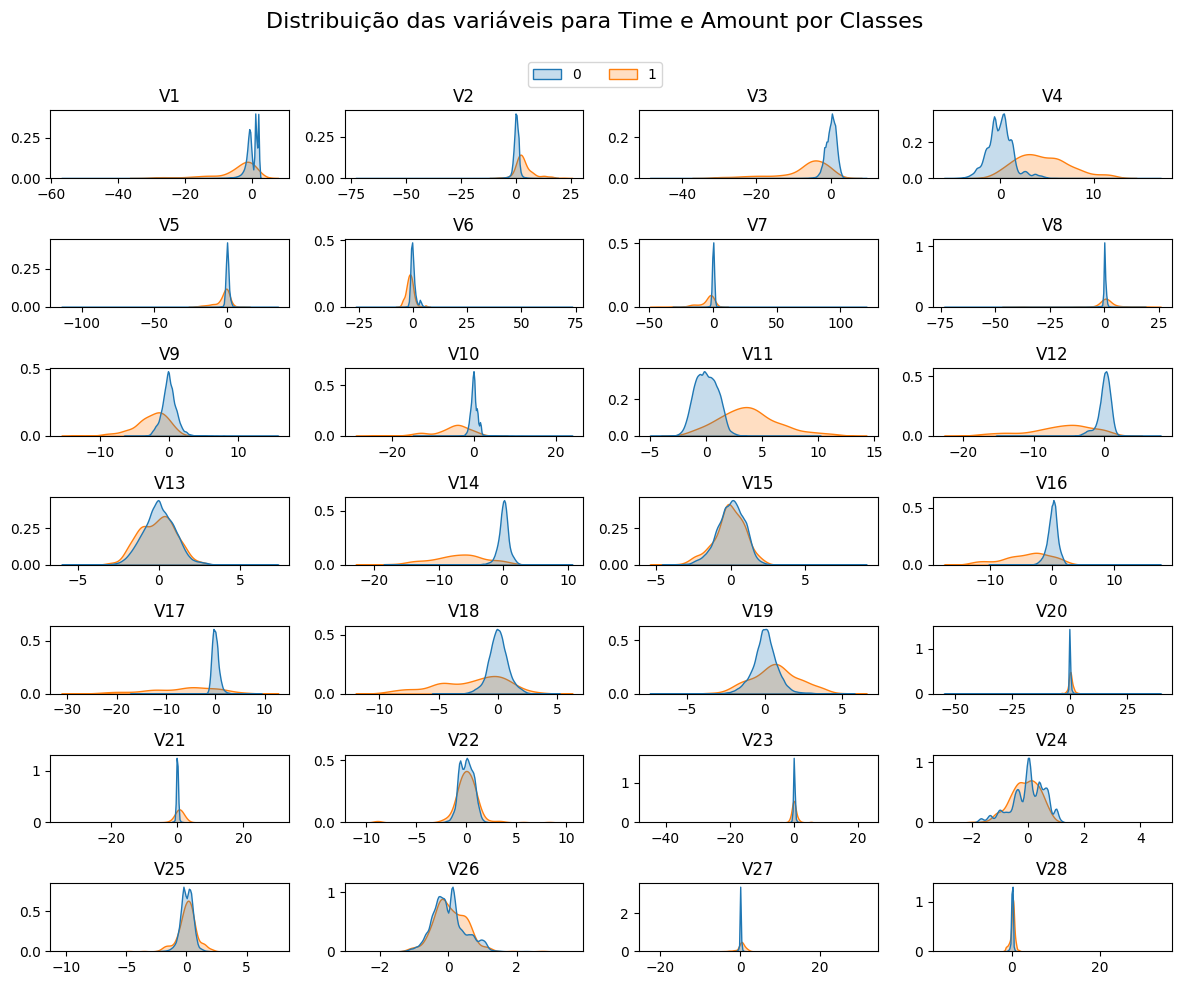

In [84]:
# KDE para as colunas que começam com "V"

# Cria uma figura com 7 linhas e 4 colunas para os subplots, com tamanho específico
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(12, 10), tight_layout=True)

# Para cada eixo e cada feature (variável) que começa com "V"
for ax, feature in zip(axes.flatten(), colunas_V):

    # Plota um gráfico de densidade (KDE) para cada feature, com a classe como matiz
    k = sns.kdeplot(x=feature, data=df, ax=ax, hue="Class", fill=True, common_norm=False)

    # Define o título do gráfico como o nome da feature
    ax.set_title(feature)

    # Remove o rótulo do eixo x
    ax.set_xlabel("")

    # Remove o rótulo do eixo y
    ax.set_ylabel("")

    # Obtém a legenda do gráfico
    legend = ax.get_legend()

    # Remove a legenda do gráfico
    legend.remove()

# Adiciona um título à figura
fig.suptitle("Distribuição das variáveis para Time e Amount por Classes\n\n", fontsize=16)

# Obtém os rótulos da legenda
labels = [text.get_text() for text in legend.get_texts()]

# Adiciona uma legenda à figura
fig.legend(
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 0.935),
    bbox_transform=fig.transFigure,
    handles=legend.legend_handles,
    labels=labels,
)

# Exibe a figura
plt.show()


Com a exibição dos gráficos, é possível visualizar que as variáveis foram centralizadas em média zero. Para algumas das variáveis, há um diferença na distribuição entre a classe 0 e a classe 1, mas decidiu-se não mexer na escalibidades dessas variáveis

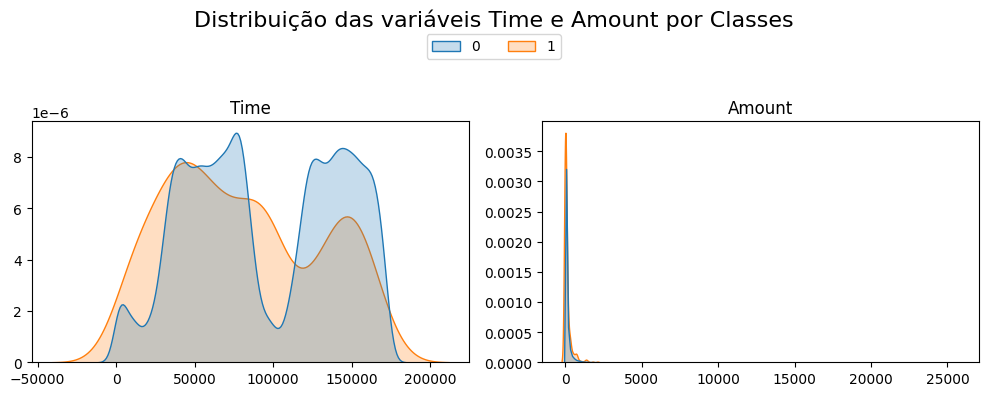

In [85]:
# KDE para as colunas que Time e Amount

# Cria uma figura com uma linha e duas colunas para os subplots, com tamanho específico
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), tight_layout=True)

# Para cada eixo e cada feature (variável) não relacionada a "V"
for ax, feature in zip(axes.flatten(), colunas_nao_V):

    # Plota um gráfico de densidade (KDE) para cada feature, com a classe como matiz
    k = sns.kdeplot(x=feature, data=df, ax=ax, hue="Class", fill=True, common_norm=False)

    # Define o título do gráfico como o nome da feature
    ax.set_title(feature)

    # Remove o rótulo do eixo x
    ax.set_xlabel("")

    # Remove o rótulo do eixo y
    ax.set_ylabel("")

    # Obtém a legenda do gráfico
    legend = ax.get_legend()

    # Remove a legenda do gráfico
    legend.remove()

# Adiciona um título à figura
fig.suptitle("Distribuição das variáveis Time e Amount por Classes\n\n", fontsize=16)

# Obtém os rótulos da legenda
labels = [text.get_text() for text in legend.get_texts()]

# Adiciona uma legenda à figura
fig.legend(
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 0.935),
    bbox_transform=fig.transFigure,
    handles=legend.legend_handles,
    labels=labels,
)

# Exibe a figura
plt.show()


Para a coluna Time, percebe-se que há picos de transações, o que poderia ser uma sazionalidade, por exemplo.
Já para a coluna Amount, há uma amplitude de valores muito grande, limitando o kde a uma faixa pequena. No describe, viu-se que a média e a mediana eram valores pequenos, mas o valor máximo era muito grande. No box plot, verificamos essa ocorrência.

### 3.3. Visualizações Multimodais

### 3.3.1 Pair Plot

In [86]:
# pair plot com Seaborn - (foi comentado apenas devido ao tempo de execução)
#sns.pairplot(data=df)

### 3.3.1 Mapa de Calor

<Axes: >

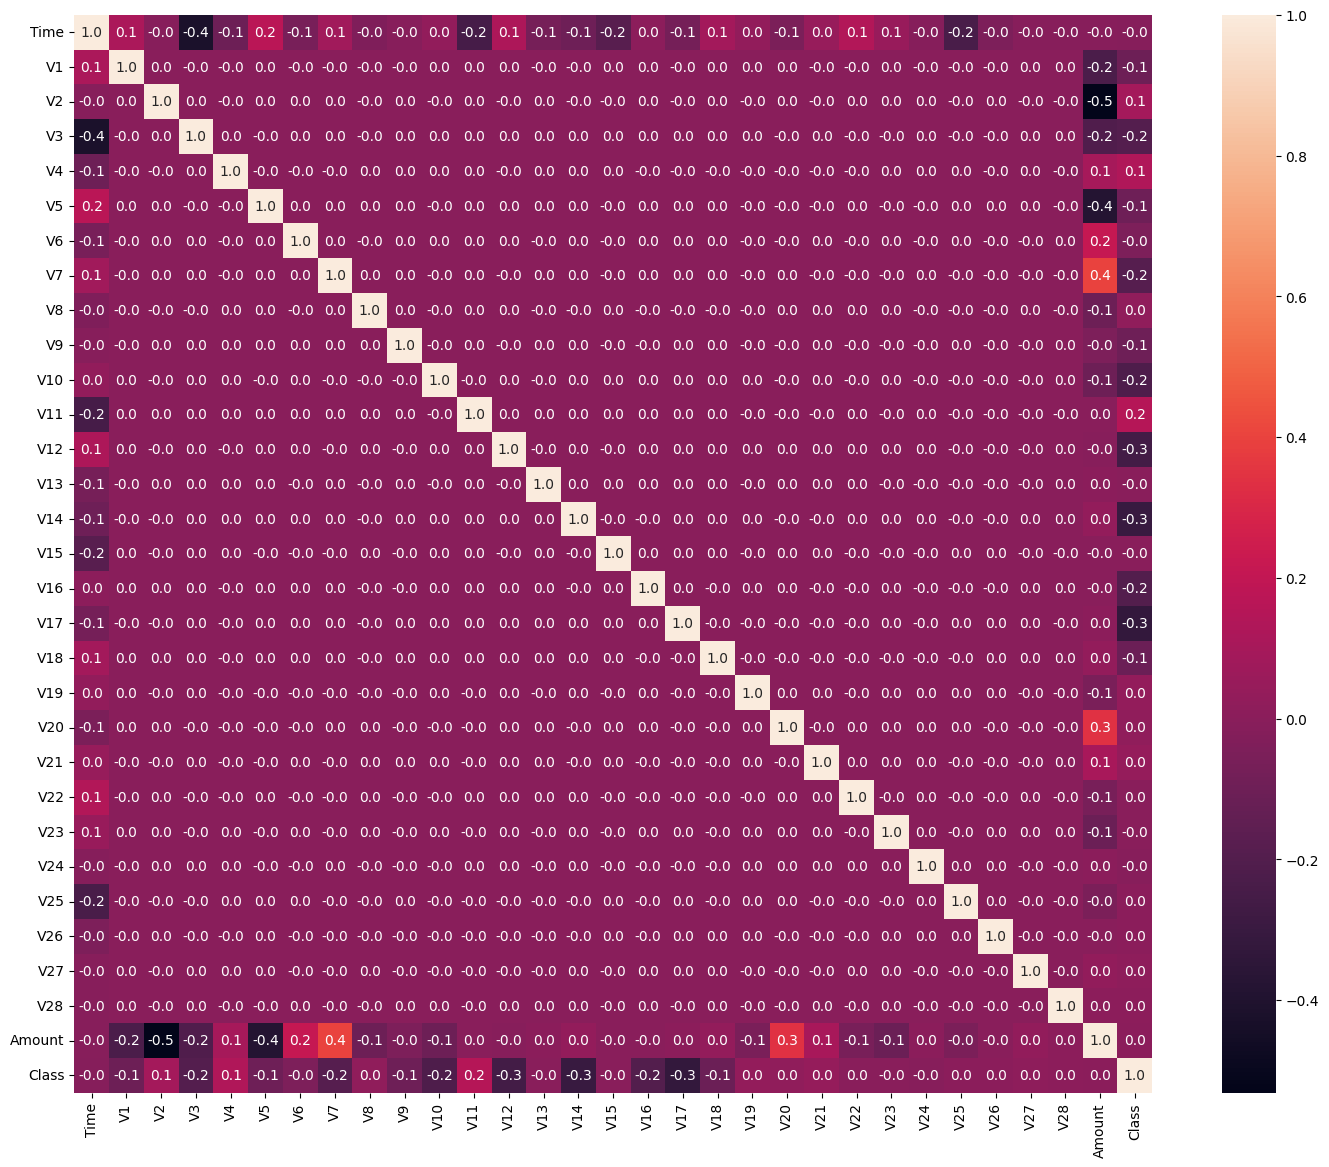

In [87]:
# Tamanho personalizado da figura
figura, graficos = plt.subplots(figsize=(18, 14))

# Calcula a matriz de correlação para o DataFrame df
corr = df.corr()

# Criando o mapa de calor com seaborn
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            square=True, ax=graficos, annot=True, fmt=".1f")

A análise do mapa de calor revela ausência de correlações significativas. Dessa forma, a princípio, não será aplicada feature selection.


---



# 4. Separação das bases em treino e teste

In [88]:
# Criando um seed global
Random_State = 1

In [89]:
# Realizando a separação em X e y
X = df.drop("Class", axis=1)
y = df["Class"]


# 5. Pipeline

Algumas definições:

- **Pileline**: É uma sequência de transformações de dados conectadas, que automatiza processos de pré-processamento e modelagem, simplificando o desenvolvimento e a reprodução de fluxos de trabalho de análise de dados e machine learning.

- **Sampler**: Optou-se pelo uso de um "Sampler" (*RandomOverSampler* ou *RandomUnderSampler*), pelo fato das classes estarem desbalanceadas, informações, essas, que foram validadas na etapa de análise de dados.

- **RobustScaler**: é uma técnica de pré-processamento utilizada para dimensionar as características (*features*) de um conjunto de dados. Ela opera de forma semelhante ao *StandardScaler*, mas é mais robusta em relação a *outliers*.

A principal diferença entre o *RobustScaler* e o *StandardScaler* é o método de cálculo da média e do desvio padrão. Enquanto o *StandardScaler* utiliza a média e o desvio padrão dos dados, o *RobustScaler* utiliza estimativas mais robustas, como a mediana e o intervalo interquartil (*IQR*). Isso torna o *RobustScaler* menos sensível a *outliers* em comparação com o *StandardScaler*.

In [90]:
# Define a função resampling que recebe X (features), y (variável alvo),
## um objeto sampler, um objeto modelo e kf (o esquema de validação cruzada)

def resampling(X, y, sampler, modelo, kf):
    pipeline = Pipeline( # Cria um pipeline para encadear as etapas de pré-processamento, amostragem e modelagem
        [
            (
                "preprocessamento",                        # Etapa de pré-processamento
                ColumnTransformer(                         # Aplica transformações diferentes às colunas específicas
                    [("rob_scaler", RobustScaler(), ["Time", "Amount"])], # Usa RobustScaler nas colunas "Time" e "Amount"
                    remainder="passthrough", # Mantém as outras colunas sem transformação
                ),
            ),
            ("sampler", sampler), # Adiciona o objeto sampler ao pipeline
            ("modelo", modelo), # Adiciona o objeto modelo ao pipeline
        ]
    )

    scores = cross_validate( # Realiza validação cruzada
        pipeline, # Usa o pipeline definido
        X, # Features
        y, # Variável alvo
        cv=kf, # Esquema de validação cruzada
        scoring=["accuracy", "precision", "recall", "roc_auc", "average_precision"], # Métricas de avaliação
        n_jobs=-1, # Usa todos os núcleos de CPU disponíveis
    )

    return scores # Retorna as pontuações de desempenho do modelo


In [91]:
# Dicionário com os "Samplers"
samplers = {
    "RUS": RandomUnderSampler(random_state=Random_State),
    "ROS": RandomOverSampler(random_state=Random_State),
}

# Dicionário com os classificadores(modelos) a serem testados
modelos = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=Random_State),
    "LogisticRegression": LogisticRegression(random_state=Random_State),
    "KNNClassifier": KNeighborsClassifier(n_neighbors=5),
}

# Definição de Folds, mas usando o metódo Stratified
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=Random_State)

Acima, usou-se oStratifiedKFold para manter a proporção na distribuição de classes, nos k folds (5). Shuffle=True é para embaralhar os dados, já a coluna Time demostrou ter um comportamento de sazionalidade

In [92]:
# Criando um dicionário para armazenamento dos resultados de RUS
resultados_rus = {
    "DecisionTreeClassifier": resampling(
        X, y, samplers["RUS"], modelos["DecisionTreeClassifier"], skf
    ),
    "LogisticRegression": resampling(
        X, y, samplers["RUS"], modelos["LogisticRegression"], skf
    ),
    "KNNClassifier": resampling(X, y, samplers["RUS"], modelos["KNNClassifier"], skf),
}

In [93]:
# Criando um dicionário para armazenamento dos resultados de ROS
resultados_ros = {
    "DecisionTreeClassifier": resampling(
        X, y, samplers["ROS"], modelos["DecisionTreeClassifier"], skf
    ),
    "LogisticRegression": resampling(
        X, y, samplers["ROS"], modelos["LogisticRegression"], skf
    ),
    "KNNClassifier": resampling(X, y, samplers["ROS"], modelos["KNNClassifier"], skf),
}

In [94]:
# criando uma chave time para cada modelo em cada dicionário, que é a soma de fit_time e score_time

for k, v in resultados_rus.items():
    resultados_rus[k]["time"] = resultados_rus[k]["fit_time"] + resultados_rus[k][
        "score_time"
    ]

for k, v in resultados_ros.items():
    resultados_ros[k]["time"] = resultados_ros[k]["fit_time"] + resultados_ros[k][
        "score_time"
    ]


## 5.1 Análise dos resultados da Pipeline

In [95]:
# Transformando os resultados RUS do dicionário em um Dataframe
df_rus = pd.DataFrame(resultados_rus).T.assign(sampler="RUS").reset_index().rename(
    columns={"index": "modelo"}
)

# Exibindo df_resultados
df_rus.head()

# T.: para transpor a tabela
# reset_index(): para recriar os índices do dataframe
# rename: trocando o nome index para modelo

,modelo,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time,sampler
0,DecisionTreeClassifier,"[0.3921787738800049, 0.37392640113830566, 0.28...","[0.17782998085021973, 0.17756080627441406, 0.1...","[0.8799726133211615, 0.9161019627119834, 0.901...","[0.013009540329575022, 0.018320296418279126, 0...","[0.9090909090909091, 0.898989898989899, 0.9387...","[0.8945064133411565, 0.9075608271306704, 0.919...","[0.011984854915290454, 0.016645317060114042, 0...","[0.5700087547302246, 0.5514872074127197, 0.467...",RUS
1,LogisticRegression,"[0.28693199157714844, 0.2928426265716553, 0.26...","[0.1658029556274414, 0.19011187553405762, 0.16...","[0.9716828763035006, 0.9736139882728837, 0.955...","[0.05154028436018957, 0.059045226130653265, 0....","[0.8787878787878788, 0.9494949494949495, 0.928...","[0.9712278510266656, 0.9865414605403702, 0.983...","[0.6518521744916822, 0.7721853307509213, 0.657...","[0.45273494720458984, 0.4829545021057129, 0.43...",RUS
2,KNNClassifier,"[0.26621580123901367, 0.26087164878845215, 0.2...","[7.098846435546875, 7.0446250438690186, 5.8677...","[0.9763877672834521, 0.9777746567887363, 0.968...","[0.06002824858757062, 0.06745737583395107, 0.0...","[0.8585858585858586, 0.9191919191919192, 0.908...","[0.9596969466040741, 0.9764319238318149, 0.972...","[0.3501745654192264, 0.32637908461283593, 0.37...","[7.365062236785889, 7.305496692657471, 6.14498...",RUS


In [96]:
# Transformando os resultados ROS do dicionário em um Dataframe
df_ros = pd.DataFrame(resultados_ros).T.assign(sampler="ROS").reset_index().rename(
    columns={"index": "modelo"}
)

# Exibindo df_ros
df_ros.head()

,modelo,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time,sampler
0,DecisionTreeClassifier,"[25.74811053276062, 32.185221910476685, 28.170...","[0.19976472854614258, 0.1354985237121582, 0.17...","[0.9989642217618764, 0.9991397773954567, 0.999...","[0.7040816326530612, 0.75, 0.7613636363636364,...","[0.696969696969697, 0.7575757575757576, 0.6836...","[0.8482298496279469, 0.8785680521871015, 0.841...","[0.49125022905287447, 0.5686031517024108, 0.52...","[25.947875261306763, 32.32072043418884, 28.344...",ROS
1,LogisticRegression,"[9.473230123519897, 8.103620767593384, 7.21074...","[0.15601348876953125, 0.15388131141662598, 0.1...","[0.9774586566482918, 0.9750008777781679, 0.978...","[0.0640176600441501, 0.0627062706270627, 0.068...","[0.8787878787878788, 0.9595959595959596, 0.928...","[0.9744839492830278, 0.9883638452655211, 0.985...","[0.6738372505749649, 0.8127591321865272, 0.736...","[9.629243612289429, 8.25750207901001, 7.373801...",ROS
2,KNNClassifier,"[0.4805185794830322, 0.5158684253692627, 0.453...","[577.4953353404999, 575.7433111667633, 580.180...","[0.9990519995786665, 0.9988939995084443, 0.999...","[0.6991150442477876, 0.6304347826086957, 0.730...","[0.797979797979798, 0.8787878787878788, 0.8571...","[0.9088965734939392, 0.9391646979973308, 0.933...","[0.7094849775592013, 0.7180801600668134, 0.782...","[577.9758539199829, 576.2591795921326, 580.633...",ROS


In [97]:
# Criando um único dataframe com os resultados RUS e ROS
df_resultados = pd.concat([df_rus, df_ros]).reset_index(drop=True) #ajustando o índice e excluindo o anterior

# Exibindo df_resultados
df_resultados

,modelo,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time,sampler
0,DecisionTreeClassifier,"[0.3921787738800049, 0.37392640113830566, 0.28...","[0.17782998085021973, 0.17756080627441406, 0.1...","[0.8799726133211615, 0.9161019627119834, 0.901...","[0.013009540329575022, 0.018320296418279126, 0...","[0.9090909090909091, 0.898989898989899, 0.9387...","[0.8945064133411565, 0.9075608271306704, 0.919...","[0.011984854915290454, 0.016645317060114042, 0...","[0.5700087547302246, 0.5514872074127197, 0.467...",RUS
1,LogisticRegression,"[0.28693199157714844, 0.2928426265716553, 0.26...","[0.1658029556274414, 0.19011187553405762, 0.16...","[0.9716828763035006, 0.9736139882728837, 0.955...","[0.05154028436018957, 0.059045226130653265, 0....","[0.8787878787878788, 0.9494949494949495, 0.928...","[0.9712278510266656, 0.9865414605403702, 0.983...","[0.6518521744916822, 0.7721853307509213, 0.657...","[0.45273494720458984, 0.4829545021057129, 0.43...",RUS
2,KNNClassifier,"[0.26621580123901367, 0.26087164878845215, 0.2...","[7.098846435546875, 7.0446250438690186, 5.8677...","[0.9763877672834521, 0.9777746567887363, 0.968...","[0.06002824858757062, 0.06745737583395107, 0.0...","[0.8585858585858586, 0.9191919191919192, 0.908...","[0.9596969466040741, 0.9764319238318149, 0.972...","[0.3501745654192264, 0.32637908461283593, 0.37...","[7.365062236785889, 7.305496692657471, 6.14498...",RUS
3,DecisionTreeClassifier,"[25.74811053276062, 32.185221910476685, 28.170...","[0.19976472854614258, 0.1354985237121582, 0.17...","[0.9989642217618764, 0.9991397773954567, 0.999...","[0.7040816326530612, 0.75, 0.7613636363636364,...","[0.696969696969697, 0.7575757575757576, 0.6836...","[0.8482298496279469, 0.8785680521871015, 0.841...","[0.49125022905287447, 0.5686031517024108, 0.52...","[25.947875261306763, 32.32072043418884, 28.344...",ROS
4,LogisticRegression,"[9.473230123519897, 8.103620767593384, 7.21074...","[0.15601348876953125, 0.15388131141662598, 0.1...","[0.9774586566482918, 0.9750008777781679, 0.978...","[0.0640176600441501, 0.0627062706270627, 0.068...","[0.8787878787878788, 0.9595959595959596, 0.928...","[0.9744839492830278, 0.9883638452655211, 0.985...","[0.6738372505749649, 0.8127591321865272, 0.736...","[9.629243612289429, 8.25750207901001, 7.373801...",ROS
5,KNNClassifier,"[0.4805185794830322, 0.5158684253692627, 0.453...","[577.4953353404999, 575.7433111667633, 580.180...","[0.9990519995786665, 0.9988939995084443, 0.999...","[0.6991150442477876, 0.6304347826086957, 0.730...","[0.797979797979798, 0.8787878787878788, 0.8571...","[0.9088965734939392, 0.9391646979973308, 0.933...","[0.7094849775592013, 0.7180801600668134, 0.782...","[577.9758539199829, 576.2591795921326, 580.633...",ROS


In [98]:
# Visualizando as informações de df_resultados para identificação de types
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   modelo                  6 non-null      object
 1   fit_time                6 non-null      object
 2   score_time              6 non-null      object
 3   test_accuracy           6 non-null      object
 4   test_precision          6 non-null      object
 5   test_recall             6 non-null      object
 6   test_roc_auc            6 non-null      object
 7   test_average_precision  6 non-null      object
 8   time                    6 non-null      object
 9   sampler                 6 non-null      object
dtypes: object(10)
memory usage: 608.0+ bytes


Basicamente, cada modelo foi executado 5 vezes e as informações dos resultados ficaram colapsadas como um array. Para ajustar, utilizar-se-á o método explode, a fim de extrair as informações contidas como array

In [99]:
# Determinando as colunas que serão utilizadas no explode
df_resultados.columns[1:-1].tolist() #removendo a primeira e última coluna e transformando em uma lista

['fit_time',
 'score_time',
 'test_accuracy',
 'test_precision',
 'test_recall',
 'test_roc_auc',
 'test_average_precision',
 'time']

In [100]:
# Executando o método explode
df_resultados_explode = df_resultados.explode(df_resultados.columns[1:-1].tolist()).reset_index(drop=True)
df_resultados_explode

,modelo,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time,sampler
0,DecisionTreeClassifier,0.392179,0.17783,0.879973,0.01301,0.909091,0.894506,0.011985,0.570009,RUS
1,DecisionTreeClassifier,0.373926,0.177561,0.916102,0.01832,0.89899,0.907561,0.016645,0.551487,RUS
2,DecisionTreeClassifier,0.282697,0.184309,0.901248,0.016109,0.938776,0.91998,0.015228,0.467005,RUS
3,DecisionTreeClassifier,0.281826,0.175514,0.904654,0.015798,0.887755,0.896219,0.014218,0.45734,RUS
4,DecisionTreeClassifier,0.172722,0.100413,0.893471,0.014476,0.908163,0.900804,0.013305,0.273135,RUS
5,LogisticRegression,0.286932,0.165803,0.971683,0.05154,0.878788,0.971228,0.651852,0.452735,RUS
6,LogisticRegression,0.292843,0.190112,0.973614,0.059045,0.949495,0.986541,0.772185,0.482955,RUS
7,LogisticRegression,0.268234,0.169744,0.955829,0.035,0.928571,0.983125,0.657628,0.437977,RUS
8,LogisticRegression,0.257759,0.168031,0.965819,0.044806,0.928571,0.989418,0.642774,0.42579,RUS
9,LogisticRegression,0.167873,0.103659,0.963624,0.04093,0.897959,0.975186,0.662534,0.271532,RUS


Através do info() foi verificado que todas as colunas estão como tipo Object. Entretanto, temos colunas numéricas. O processo seguinte, será uma correção para esses pontos.

In [101]:
# aplicando to_numeric para o dataframe inteiro
df_resultados_explode = df_resultados_explode.apply(pd.to_numeric, errors="ignore")

# Visualizando df_resultados_explode
df_resultados_explode

,modelo,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time,sampler
0,DecisionTreeClassifier,0.392179,0.177830,0.879973,0.013010,0.909091,0.894506,0.011985,0.570009,RUS
1,DecisionTreeClassifier,0.373926,0.177561,0.916102,0.018320,0.898990,0.907561,0.016645,0.551487,RUS
2,DecisionTreeClassifier,0.282697,0.184309,0.901248,0.016109,0.938776,0.919980,0.015228,0.467005,RUS
3,DecisionTreeClassifier,0.281826,0.175514,0.904654,0.015798,0.887755,0.896219,0.014218,0.457340,RUS
4,DecisionTreeClassifier,0.172722,0.100413,0.893471,0.014476,0.908163,0.900804,0.013305,0.273135,RUS
5,LogisticRegression,0.286932,0.165803,0.971683,0.051540,0.878788,0.971228,0.651852,0.452735,RUS
6,LogisticRegression,0.292843,0.190112,0.973614,0.059045,0.949495,0.986541,0.772185,0.482955,RUS
7,LogisticRegression,0.268234,0.169744,0.955829,0.035000,0.928571,0.983125,0.657628,0.437977,RUS
8,LogisticRegression,0.257759,0.168031,0.965819,0.044806,0.928571,0.989418,0.642774,0.425790,RUS
9,LogisticRegression,0.167873,0.103659,0.963624,0.040930,0.897959,0.975186,0.662534,0.271532,RUS


In [102]:
# Validando os types de df_resultados_explode
df_resultados_explode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   modelo                  30 non-null     object 
 1   fit_time                30 non-null     float64
 2   score_time              30 non-null     float64
 3   test_accuracy           30 non-null     float64
 4   test_precision          30 non-null     float64
 5   test_recall             30 non-null     float64
 6   test_roc_auc            30 non-null     float64
 7   test_average_precision  30 non-null     float64
 8   time                    30 non-null     float64
 9   sampler                 30 non-null     object 
dtypes: float64(8), object(2)
memory usage: 2.5+ KB


## 5.2 Gráficos para exibição/comparação de resultados

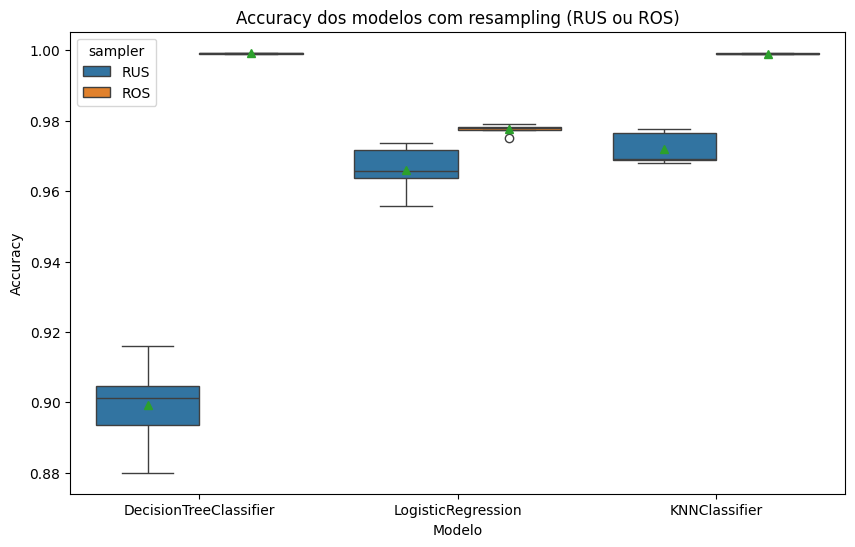

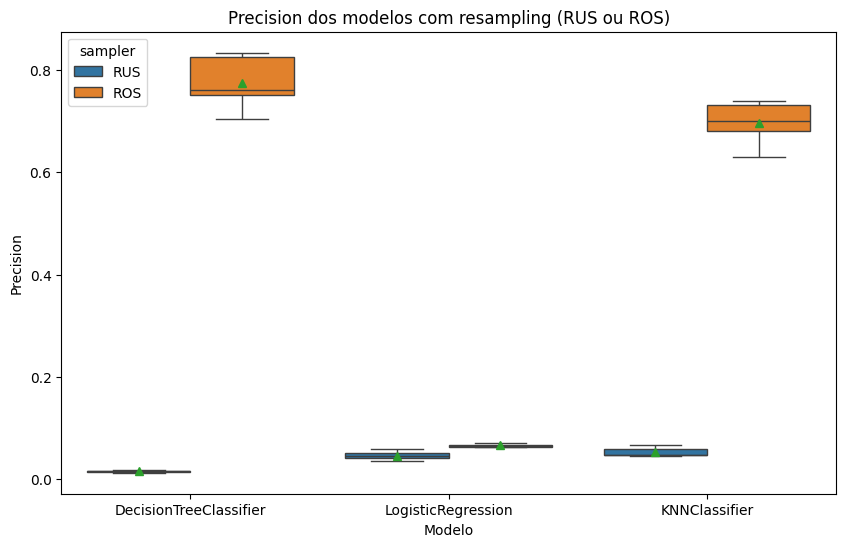

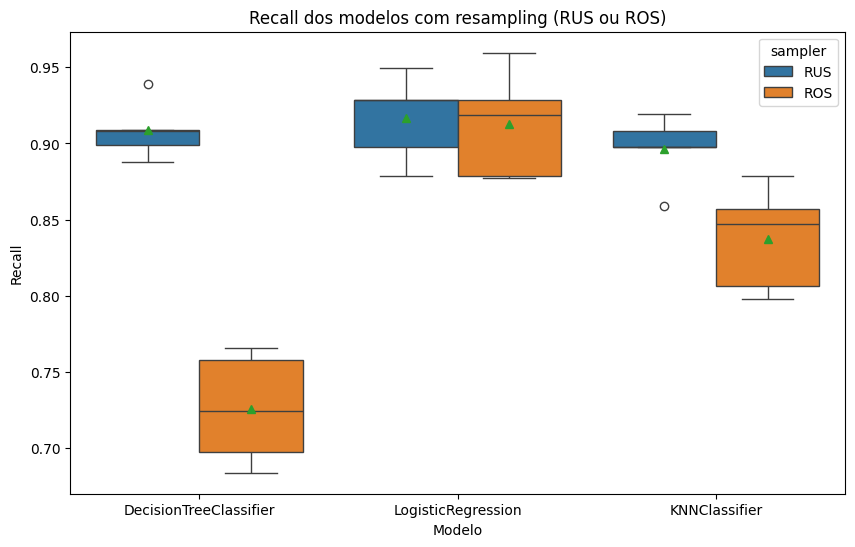

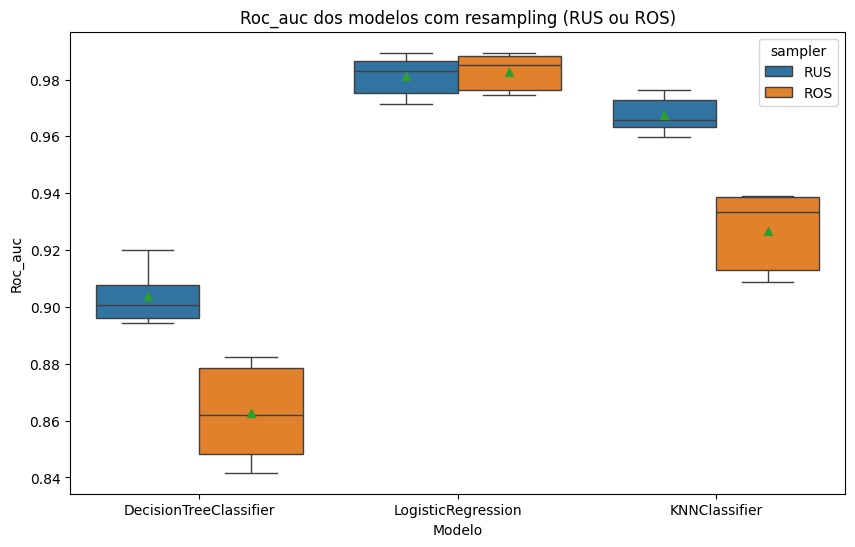

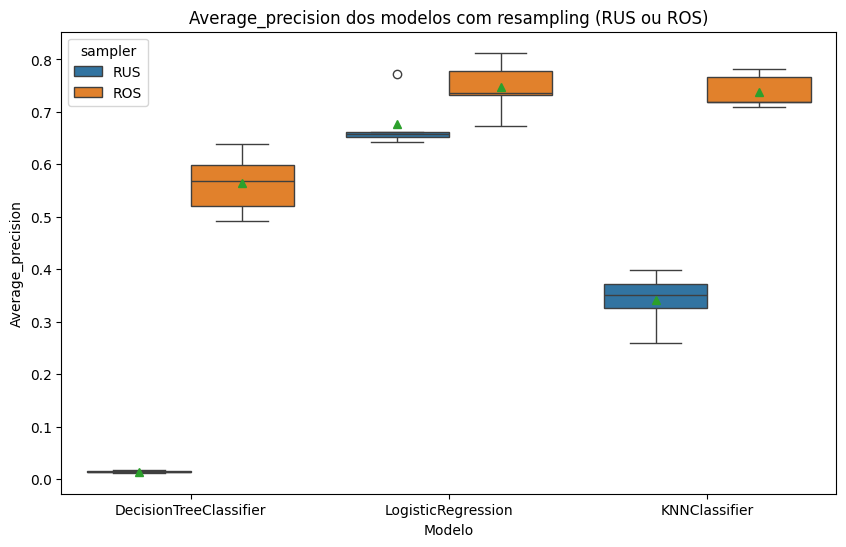

In [103]:
# Criando Box Plot para exibição dos resultados das métricas

# Lista de métricas
metricas = ["accuracy", "precision", "recall", "roc_auc", "average_precision"]

# Espaçamento entre os subplots
hspace = 0.5  # Espaçamento vertical
wspace = 0.5  # Espaçamento horizontal

# Loop sobre cada métrica
for metrica in metricas:
    fig, ax = plt.subplots(figsize=(10, 6))     # Criar figura e eixo

    # Criar o gráfico de caixa para a métrica atual
    sns.boxplot(
        x="modelo",
        y=f"test_{metrica}",  # Usar a métrica atual
        hue="sampler",
        data=df_resultados_explode,
        ax=ax,
        showmeans=True,
    )

    # Definir título e rótulos dos eixos
    ax.set_title(f"{metrica.capitalize()} dos modelos com resampling (RUS ou ROS)")
    ax.set_xlabel("Modelo")
    ax.set_ylabel(metrica.capitalize())

    # Mostrar o gráfico
    plt.show()

    # Adicionar espaçamento entre os subplots
    fig.subplots_adjust(hspace=hspace, wspace=wspace)






Ao analisar os resultados por meio do box plot, tornou-se mais claro que o classificador LogisticRegression demonstrou um desempenho superior, de maneira geral, em comparação com os outros. Esta conclusão é suportada pela observação das medianas e da dispersão dos dados, onde o LogisticRegression tende a ter valores mais altos e uma variabilidade menor em relação aos outros classificadores.

Especificamente na métrica de precision, identificamos que o desempenho do modelo não foi significativamente superior em comparação com os outros classificadores. Este resultado sugere que a precisão do LogisticRegression pode não ser tão distintiva em relação aos concorrentes nesta métrica específica. Portanto, esse aspecto poderia ser uma área de foco para melhorias no desempenho do modelo.

Essas observações destacam a importância de analisar não apenas as métricas globais, mas também a distribuição dos resultados por meio de visualizações como o box plot, proporcionando uma compreensão mais completa do desempenho de cada modelo em diferentes aspectos.


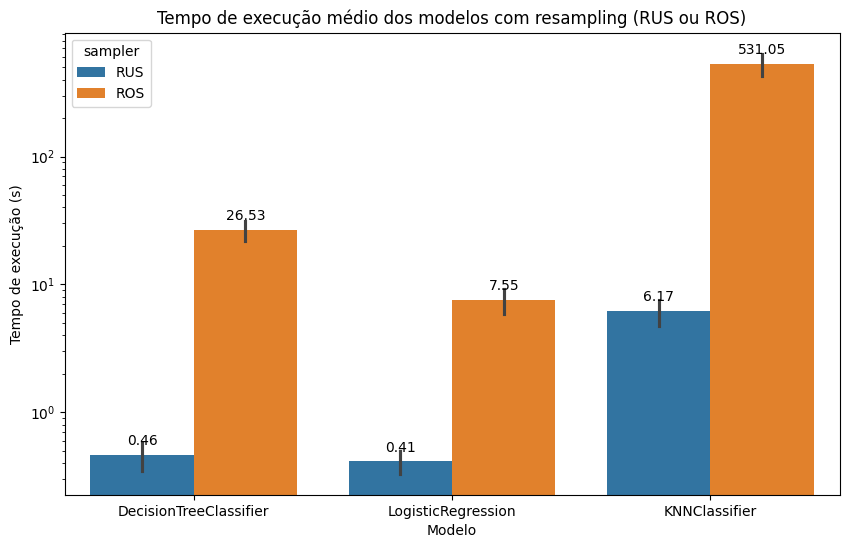

In [104]:
# Gráfico para exibição do tempo de execução
fig, ax = plt.subplots(figsize=(10, 6))

# Criando um gráfico de Barras
sns.barplot(
    data=df_resultados_explode,
    x="modelo",
    y="time",
    hue="sampler",
    ax=ax,
    errorbar="sd",
)

# Loop sobre cada métrica
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.2f", padding=5)

# Definir título e rótulos dos eixos
ax.set_title("Tempo de execução médio dos modelos com resampling (RUS ou ROS)")
ax.set_xlabel("Modelo")
ax.set_ylabel("Tempo de execução (s)")
ax.set_yscale("log")

# Mostrar o gráfico
plt.show()

Uma análise detalhada do tempo de execução entre RandomOverSampler e RandomUnderSampler revela consistentemente que o RandomOverSampler demanda mais recursos computacionais. Para sustentar essa observação, poderíamos fornecer estatísticas ou resultados empíricos específicos. No entanto, ao reavaliar as métricas de desempenho, observamos que a diferença entre os dois métodos pode não ser tão substancial quanto inicialmente presumido. É crucial reconhecer que, em projetos de grande escala, o aumento no tempo de execução pode resultar em ônus significativos. No entanto, devemos considerar também os contextos específicos de aplicação, nos quais o tempo de execução pode ser um fator crítico. Nesses cenários, mesmo uma pequena diferença nas métricas pode justificar a preferência pelo RandomUnderSampler. Diante disso, é fundamental realizar uma análise cuidadosa para determinar a melhor abordagem de amostragem, considerando tanto o desempenho das métricas quanto o impacto no tempo de execução. Sugestões para mitigar esse ônus podem incluir a otimização de algoritmos ou a adoção de técnicas de amostragem adaptativa.

Com base nas análises realizadas, escolheu-se o Logistic Regression com o RandomUnderSampler. Para aprimorar os resultados, serão aplicadas técnicas de hiperparâmetros.

Para um embasamento ao final da aplicação dos hiperparâmetros, vamos analisar o describe do Logistic Regression com RUS

In [105]:
# Criando um dataframe apenas com Logistic Regression e RUS
df_logistic_regression_rus = df_resultados_explode[(df_resultados_explode['modelo'] == 'LogisticRegression') & (df_resultados_explode['sampler'] == 'RUS')]

In [106]:
# Criando um dataframe para exibição do describe
describe_logistic_regression_rus = df_logistic_regression_rus.describe()

In [107]:
# Visualizando o describe
print(describe_logistic_regression_rus)

       fit_time  score_time  test_accuracy  test_precision  test_recall  \
count  5.000000    5.000000       5.000000        5.000000     5.000000   
mean   0.254728    0.159470       0.966114        0.046264     0.916677   
std    0.050560    0.032683       0.007059        0.009336     0.028044   
min    0.167873    0.103659       0.955829        0.035000     0.878788   
25%    0.257759    0.165803       0.963624        0.040930     0.897959   
50%    0.268234    0.168031       0.965819        0.044806     0.928571   
75%    0.286932    0.169744       0.971683        0.051540     0.928571   
max    0.292843    0.190112       0.973614        0.059045     0.949495   

       test_roc_auc  test_average_precision      time  
count      5.000000                5.000000  5.000000  
mean       0.981100                0.677395  0.414198  
std        0.007670                0.053497  0.082562  
min        0.971228                0.642774  0.271532  
25%        0.975186                0.651852 

# 6 Hiperparâmetros

## 6.1 Definindo o modelo a ser utilizado

In [108]:
# Remodelando o Pipeline para o modelo escolhido
pipeline = Pipeline(
    [
        (
            "preprocessamento",
            ColumnTransformer(
                [("scaler", RobustScaler(), ["Time", "Amount"])],
                remainder="passthrough",
            ),
        ),
        ("sampler", RandomUnderSampler(random_state=Random_State)), #fixando o Sampler escolhido - RandomUnderSampler
        ("modelo", LogisticRegression(random_state=Random_State)), #fixand o modelo escolhido LR
    ]
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=Random_State) # repetiu-se o código para facilitar a mudança de parâmetros, caso necessário

## 6.2 Criando o Param Grid

Uma grid de hiperparâmetros são parâmetros que serão explorados a fim de buscar uma combinação mais adequada para otimizar o desempenho do modelo

In [109]:
# definindo os parâmetros que serão testados para o modelo LR

param_grid = {
    "sampler__sampling_strategy": [0.5, 0.75, 1, "auto"],
    "modelo__C": np.logspace(-3, 3, 7),
    "modelo__penalty": ["l1", "l2", "elasticnet", "none"],
    "modelo__solver": ["lbfgs", "saga"]
}



O *param_grid* é uma parte crucial do processo de busca de hiperparâmetros em algoritmos de aprendizado de máquina, como o modelo de Regressão Logística (LR) neste caso. Aqui estão alguns comentários sobre a importância e onde buscar informações sobre eles na documentação:

1. **Variedade de Parâmetros Testados**: O *param_grid* permite especificar uma variedade de valores para os hiperparâmetros do modelo. Isso é importante porque diferentes combinações de hiperparâmetros podem levar a desempenhos variados do modelo.

2. **Otimização do Desempenho do Modelo**: Ao testar diferentes valores de hiperparâmetros, o *param_grid* ajuda a otimizar o desempenho do modelo, procurando a combinação que melhor se ajusta aos dados e reduz o erro de generalização.

3. **Efeito da Escolha dos Parâmetros**: Cada parâmetro pode ter um impacto significativo no desempenho do modelo. Por exemplo, o parâmetro *C* na Regressão Logística controla a força da regularização, enquanto *penalty* determina o tipo de regularização aplicada. Testar diferentes valores desses parâmetros é essencial para encontrar a configuração ideal.

4. **Busca Exaustiva ou Aleatória**: O *param_grid* pode ser usado em conjunção com métodos de busca de hiperparâmetros como *GridSearchCV* ou *RandomizedSearchCV*. Enquanto *GridSearchCV* explora todas as combinações possíveis de parâmetros especificados no grid, *RandomizedSearchCV* seleciona aleatoriamente um subconjunto de combinações, o que pode ser útil em espaços de busca grandes.

5. **Documentação como Fonte de Informação**: A documentação da biblioteca de aprendizado de máquina utilizada, como Scikit-learn no caso da Regressão Logística, é a melhor fonte para obter informações sobre os parâmetros aceitos e seus valores. No caso específico do *param_grid*, a documentação do Scikit-learn sobre a classe *GridSearchCV* fornece exemplos detalhados de como usar essa estrutura para otimização de hiperparâmetros.

Portanto, ao utilizar o *param_grid*, é fundamental consultar a documentação da biblioteca para entender completamente os parâmetros disponíveis e seus efeitos, além de experimentar diferentes combinações para obter o melhor desempenho do modelo.
https://scikit-learn.org/stable/modules/grid_search.html#tips-for-parameter-search

In [110]:
# criando o objeto de grid_search

grid_search = GridSearchCV(
    pipeline, #utilizará a pipeline criada
    param_grid, #utilizará os parâmetros criados em param_grid
    scoring=["recall", "average_precision"], # defindo as métricas a serem avaliadas
    n_jobs=-2, #número de núcleos de processamento
    cv=skf, #divisão da validação cruzada (folds)
    refit="average_precision", #definindo a métrica mais relevante
    verbose=1, #controle de mensagens de retorno
)

O destaque para a melhoria dos escores de recall e average precision é essencial pelos seguintes motivos:

O "average_precision" (precisão média) é uma métrica crucial em problemas de classificação binária, especialmente em conjuntos de dados desbalanceados. Eis algumas razões que evidenciam sua importância:

1. **Sensibilidade ao Desbalanceamento**: Considera a real distribuição das classes, sendo vital em cenários desse tipo.
2. **Foco na Performance Positiva**: Prioriza a taxa de verdadeiros positivos em relação aos falsos positivos, fundamental em contextos onde a identificação correta dos positivos é primordial.
3. **Interpretabilidade Intuitiva**: Fácil de interpretar, representando a média da precisão ao longo de todos os possíveis valores de limiar de decisão.
4. **Comparação de Modelos Justa**: Permite comparações justas entre diferentes modelos de classificação, especialmente em situações de desbalanceamento.
5. **Importância para Aplicações Práticas**: Fundamental em áreas onde maximizar a taxa de verdadeiros positivos é crucial, como diagnósticos médicos ou detecção de fraudes.

Por outro lado, o recall desempenha um papel crucial na avaliação de modelos de classificação, especialmente onde a detecção de todos os casos positivos é fundamental. Ele fornece insights sobre a completude do modelo e ajuda a garantir que nenhum caso positivo relevante seja negligenciado.

Ambas avaliações formam o que chamamos de AUPRC (Área sob a Curva Precisão-Revocação), calculada a partir da curva de precisão-recall, que representa a relação entre precisão e recall em diferentes pontos de corte de decisão.

Em suma, enquanto o recall (ou sensibilidade) mede a proporção de verdadeiros positivos identificados corretamente em relação a todos os positivos reais, a precisão mede a proporção de verdadeiros positivos em relação a todos os exemplos classificados como positivos.

In [111]:
# Executando o fit utilizando o grid_search

grid_search.fit(X, y)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessamento',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         RobustScaler(),
                                                                         ['Time',
                                                                          'Amount'])])),
                                       ('sampler',
                                        RandomUnderSampler(random_state=1)),
                                       ('modelo',
                                        LogisticRegression(random_state=1))]),
             n_jobs=-2,
             param_grid={'modelo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'modelo__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'modelo__solver': ['lbfgs', 'saga'],
                         'sampler__sampling_strategy': [0.5, 0.75, 1, 'auto']},
             refit='average_precision', scoring=['recall', 'average_precision'],
             verbose=1)

Serão aplicadas as divisões em 5 kfolds, sendo que o total de combinações aplicada é de 1.120.

In [112]:
# Verificando os melhores parâmetros - levando em consideração o refit
grid_search.best_params_

{'modelo__C': 1000.0,
 'modelo__penalty': 'l2',
 'modelo__solver': 'lbfgs',
 'sampler__sampling_strategy': 0.75}

Com base no "best_params", há as seguintes indicações:
* utilize um C com 1000, para a avaliação de range realizada
* utilize como "penalty" l2, ao invés de "l1" ou "elasticnet" ou "none"
* utilize como "solver" lbfgs ao invés de saga
* utilize sampler_samplig_strategy com 0.75 ao invés de 0.5 ou 1 ou "auto"

In [113]:
# Verificando o melhor resultado - levando em consideração o refit
grid_search.best_score_

0.7373165523025961

In [114]:
# Visualizando o estimador - levando em consideração o refit
grid_search.best_estimator_

Pipeline(steps=[('preprocessamento',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Time', 'Amount'])])),
                ('sampler',
                 RandomUnderSampler(random_state=1, sampling_strategy=0.75)),
                ('modelo', LogisticRegression(C=1000.0, random_state=1))])

Através desse diagrama, é possível visualizar os melhores parâmetros que foram aplicados


In [115]:
# Visualizando todos os resultados para os testes executados
#grid_search.cv_results_

A fim de comparar os resultados, serão exibidas as médias, valor máximo e desvio padrão encontrados, após a aplicação dos parâmetros

**Recall**

In [116]:
# Verificando o valor máximo encontrada para recall
np.nanmax(grid_search.cv_results_["mean_test_recall"])


0.9288600288600289

In [117]:
# Verificando a média encontrada para recall
np.nanmean(grid_search.cv_results_["mean_test_recall"])

0.895715169184557

In [118]:
# Verificando o desvio padrão para average_precision
np.nanstd(grid_search.cv_results_["mean_test_recall"])

0.045733071557892094

**Average Precision**

In [119]:
# Verificando o valor máximo encontrado para average_precision
np.nanmax(grid_search.cv_results_["mean_test_average_precision"])


0.7373165523025961

In [120]:
# Verificando a média encontrada para average_precision
np.nanmean(grid_search.cv_results_["mean_test_average_precision"])

0.6942972249172604

In [121]:
# Verificando o desvio padrão para average_precision
np.nanstd(grid_search.cv_results_["mean_test_average_precision"])

0.027070291315397253

Observação: a média se dá através de cada teste executado no kfold (5).
Utilizou-se nanmax para não retornar nan como valor máximo encontrado. Há presença de nan pelo de algumas combinações de teste, nos parâmetros, não serem possíveis de fazer. Nesse caso, é entre solver (lbfgs) com penalty (l1) - não compatível. Nan é uma forma de retornar um conteúdo ao invés de um erro

In [124]:
# Transformando os resultados em um dataframe
df_resultados = pd.DataFrame(
    {"aver_prec": grid_search.cv_results_["mean_test_average_precision"],
     "recall": grid_search.cv_results_["mean_test_recall"]})

# Exibindo os resultados
df_resultados

,aver_prec,recall
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,0.637289,0.530550
...,...,...
219,0.731248,0.928860
220,0.686400,0.888209
221,0.678403,0.900433
222,0.672307,0.912657


<Axes: >

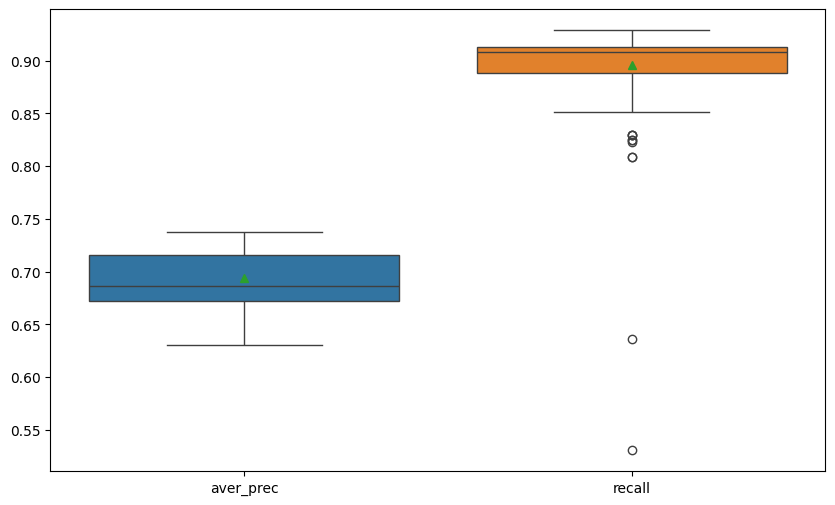

In [125]:
# Exibindo um gráfico de boxplot para comparar os resultados
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    data=df_resultados,
    showmeans=True
)

Com a aplicação dos parâmetros, notamos uma melhora significativa tanto na métrica Average Precision quanto no Recall.

No caso do Average Precision, avançamos de um desempenho anterior com uma média próxima a 67% e um valor máximo em torno de 77% (com um desvio padrão de 5%) para uma média próxima a 70%, um valor máximo próximo a 74%, e uma redução considerável no desvio padrão, que caiu para 2%. Esta redução na variabilidade dos resultados indica uma maior consistência e confiabilidade no desempenho do modelo.

Quanto ao Recall, os valores se mantiveram próximos a aplicação do modelo sem os hiperparâmetros, mas, o principal foco de melhoria foi o Average Precision e, a boa performance em ambos, é o objetivo final. Isso sugere que as mudanças nos parâmetros tiveram um impacto mais significativo na precisão do modelo do que na capacidade de identificar todos os casos positivos.

A melhora na precisão média, combinada com a estabilidade ou leve aprimoramento do Recall, indica uma otimização eficaz dos parâmetros, destacando a capacidade do modelo de classificação em identificar corretamente os exemplos positivos, especialmente em cenários onde essa precisão é crucial.

Essas descobertas reforçam a importância de ajustar cuidadosamente os parâmetros do modelo para alcançar um equilíbrio ideal entre precisão e abrangência, garantindo assim um desempenho robusto e confiável em aplicações práticas.

# 7 Conclusões

## 7.1 Escolha e aprimoramento do modelo

- Com base nas análises dos modelos, optamos pelo LogisticRegression devido à sua superior performance em comparação com os outros modelos (DecisionTreeClassifier e KNNClassifier).

- Após a seleção do LogisticRegression, decidimos aplicar técnicas de otimização de hiperparâmetros, utilizando RandomUnderSamples. O objetivo foi aprimorar as métricas de recall e average_precision, com ênfase nesta última.

- Ao compararmos os resultados de average_precision, observamos uma melhora significativa, atingindo 73,72%, em comparação à média anterior de aproximadamente 67%. Isso evidencia que a correta aplicação de hiperparâmetros contribui para a obtenção de melhores resultados.

- Para este estudo, optamos por manter todas as features, razão pela qual não aplicamos a seleção de features.

## 7.2 Resumo da estruturação do código e técnicas de Machine Learning aplicadas

Este código apresentou uma abordagem completa para lidar com um problema de classificação em um conjunto de dados desbalanceado. Abaixo, um resumo das técnicas aplicadas:

1. **Pré-processamento de Dados**:
   - Análise inicial do conjunto de dados, incluindo estatísticas descritivas e visualização das distribuições das variáveis.
   - Identificação de dados faltantes (nulos) e verificação do tipo de dados.
   - Normalização das variáveis Time e Amount usando RobustScaler para mitigar o efeito de outliers.
   
2. **Avaliação do Balanceamento das Classes**:
   - Cálculo da proporção de ocorrências de cada classe no conjunto de dados, destacando o desbalanceamento entre as classes.
   
3. **Separação em Conjuntos de Treino e Teste**:
   - Divisão do conjunto de dados em atributos (X) e rótulos (y) para posterior treinamento e teste dos modelos.

4. **Resampling e Modelagem**:
   - Utilização de técnicas de resampling (Random Under Sampler e Random Over Sampler) para balancear as classes minoritárias.
   - Aplicação de diversos modelos de classificação (Decision Tree, Logistic Regression e KNN) em conjunto com validação cruzada estratificada para avaliar o desempenho dos modelos.
   - Avaliação de métricas de desempenho, como acurácia, precisão, recall, área sob a curva ROC (ROC AUC) e precisão média (average precision).
   - Visualização dos resultados por meio de gráficos de boxplot para comparar o desempenho dos modelos com resampling.

5. **Otimização de Hiperparâmetros**:
   - Realização de uma busca em grade (Grid Search) para encontrar os melhores hiperparâmetros para o modelo selecionado (Logistic Regression) em termos de recall e precisão média.
   - Avaliação dos melhores parâmetros e do desempenho associado a eles.

Em resumo, o código aborda uma série de etapas essenciais no processo de construção e avaliação de modelos de classificação para conjuntos de dados desbalanceados. As técnicas empregadas incluem pré-processamento de dados, resampling para lidar com o desbalanceamento, seleção de modelos e otimização de hiperparâmetros. O uso de visualizações e métricas de desempenho fornece insights valiosos sobre a eficácia dos modelos em lidar com o problema em questão.
